# Random Forest Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('../Data/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

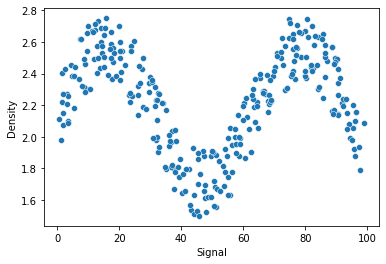

In [7]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [14]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                y,
                test_size=0.1,
                random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()

In [20]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
lr_preds = lr_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [30]:
def run_model(model, X_train, y_train, X_test, y_test):
    # FIT MODEL
    model.fit(X_train, y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    rms = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'RMSE: {rms}')
    print(f'MAE: {mae}')
    
    # Plot results
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    
    plt.plot(signal_range, signal_preds)

RMSE: 0.2570051996584629
MAE: 0.211198973318633


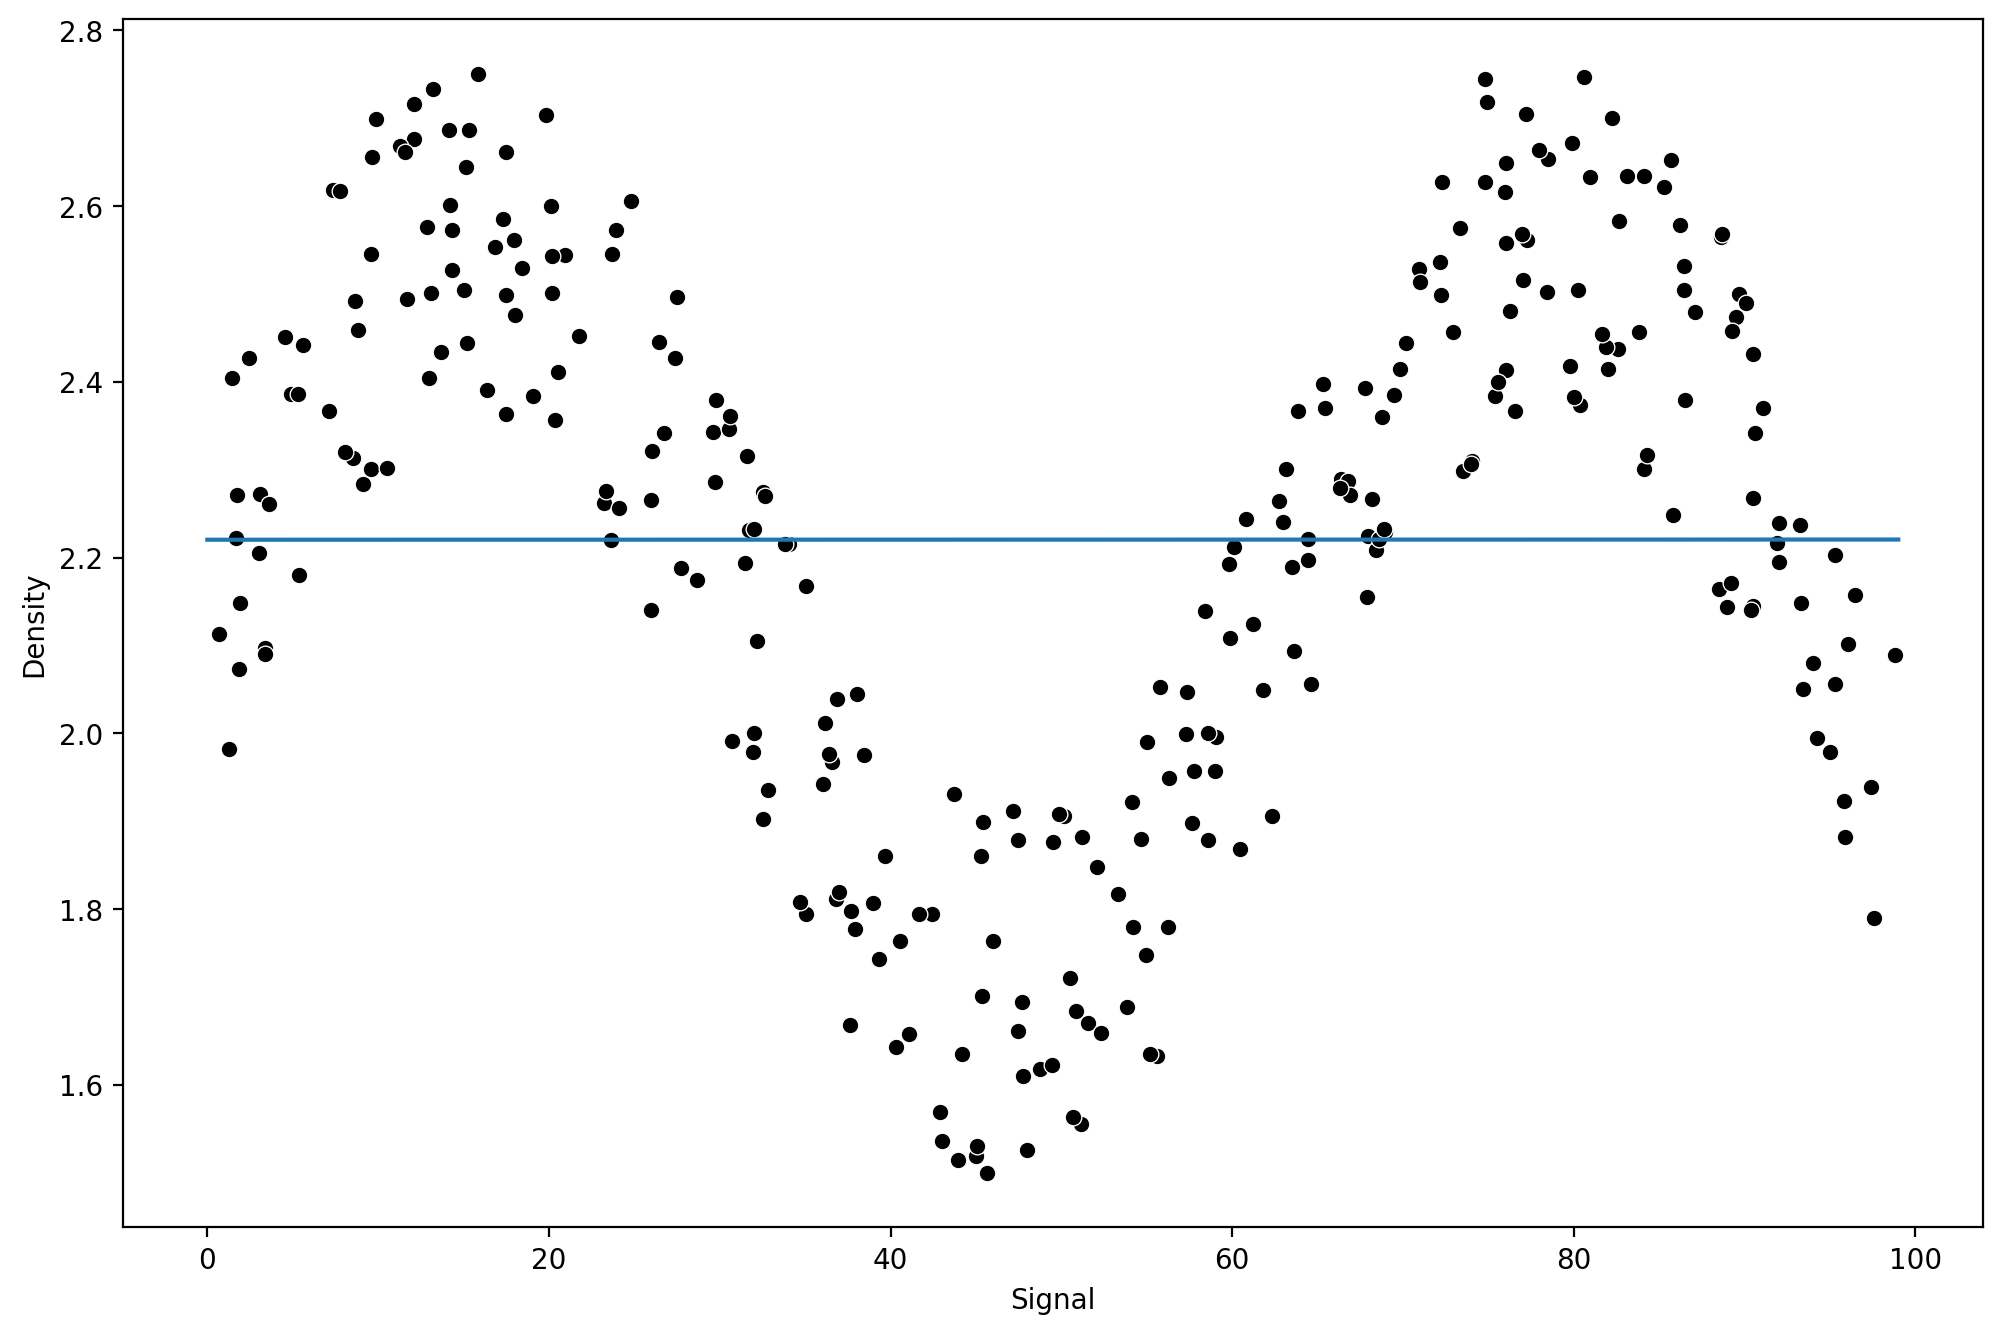

In [32]:
model = LinearRegression()
run_model(lr_model, X_train, y_train, X_test, y_test)

## Using Polynomial Regression

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

RMSE: 0.13807449061369523
MAE: 0.11969122389483897


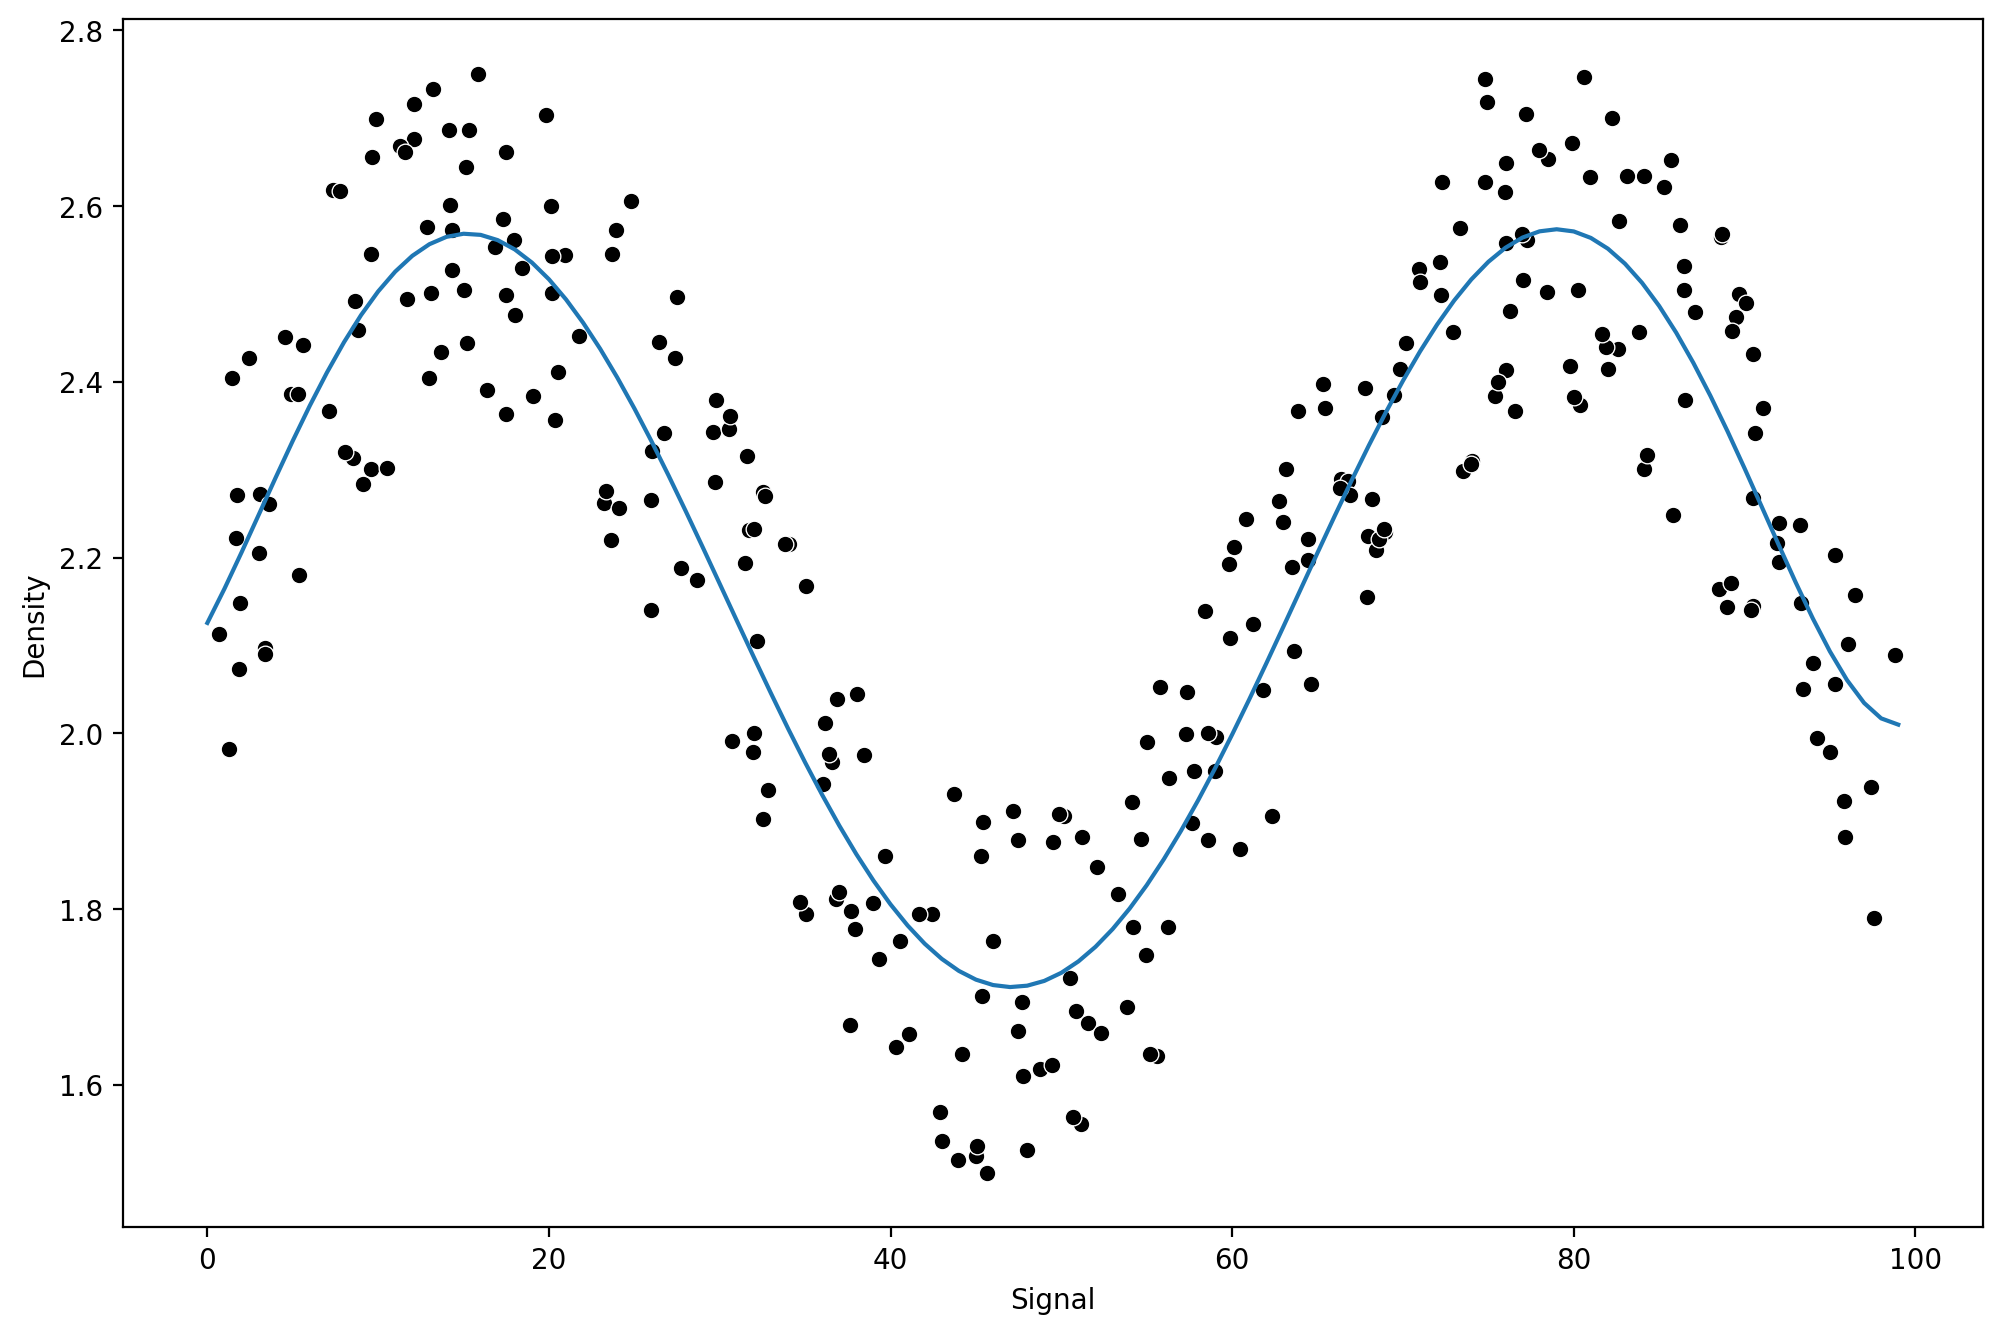

In [43]:
run_model(pipe, X_train, y_train, X_test, y_test)